# 04. Trend Analysis & Forecasting

In [1]:
import pandas as pd
import plotly.express as px
import os

processed_path = os.path.join("..", "data", "processed", "merged_master_table.csv")
df = pd.read_csv(processed_path)
df['date'] = pd.to_datetime(df['date'])

# Daily Aggregation
daily_trend = df.groupby('date')[['total_enrolment', 'total_bio_updates', 'total_demo_updates']].sum().reset_index()

fig = px.line(daily_trend, x='date', y=['total_enrolment', 'total_bio_updates', 'total_demo_updates'], title="National Daily Trends")
fig.show()

C:\Users\Kaustab das\AppData\Roaming\Python\Python39\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
C:\Users\Kaustab das\AppData\Roaming\Python\Python39\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




### Decomposition
Identify Seasonality vs Trend using Statsmodels.

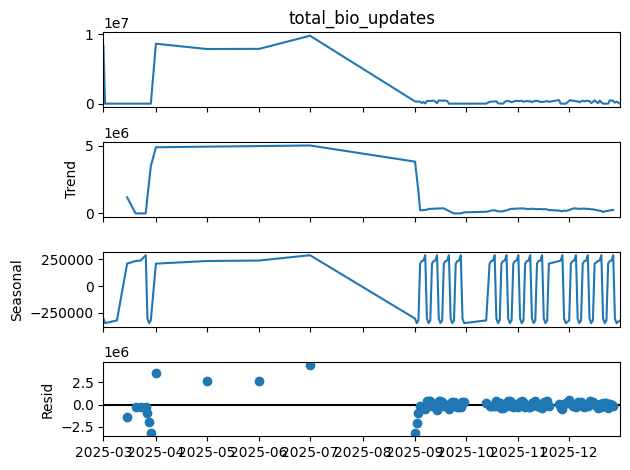

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Check if we have enough days
if len(daily_trend) > 10:
    ts = daily_trend.set_index('date')['total_bio_updates']
    # Use period=7 for weekly seasonality
    result = seasonal_decompose(ts, model='additive', period=min(7, len(ts)//2)) 
    result.plot()
    plt.show()
else:
    print("Not enough data points for seasonal decomposition.")